In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline


In [9]:
df = pd.read_csv('../data/cleaned_data.csv')

In [20]:
# Make sure "address" column is string
df['address'] = df['address'].astype(str)

# One-hot encode with sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
address_encoded = encoder.fit_transform(df[['address']])  # now returns dense array

# Now you can safely convert to DataFrame
address_df = pd.DataFrame(address_encoded, columns=encoder.get_feature_names_out(['address']))

# Reset index if needed
address_df.reset_index(drop=True, inplace=True)
# Combine with numerical feature
X = pd.concat([df[['square']].reset_index(drop=True), address_df], axis=1)
y = df['price']


In [ ]:
X

,square,address_Bektemir,address_Chilonzor,address_Mirobod,address_Mirzo-Ulug‘bek,address_Olmazor,address_Shayxontohur,address_Sirg‘ali,address_Uchtepa,address_Yakkasaroy,address_Yashnobod,address_Yunusobod
0,500.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,250.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
618,300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
619,215.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
620,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
)
model.fit(X_train, y_train)


,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [52]:
# Predict
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")


MAE: 1,627,120,504
R² Score: 0.6397


In [ ]:
def pred(square, address):
    new_square = square
    new_address = address

    # Encode new address
    loc_array = encoder.transform([[new_address]])
    new_features = [[new_square] + list(loc_array[0])]

    # Predict price
    predicted_price = model.predict(new_features)[0]
    print(f"Estimated price: {predicted_price:,.0f} so'm")


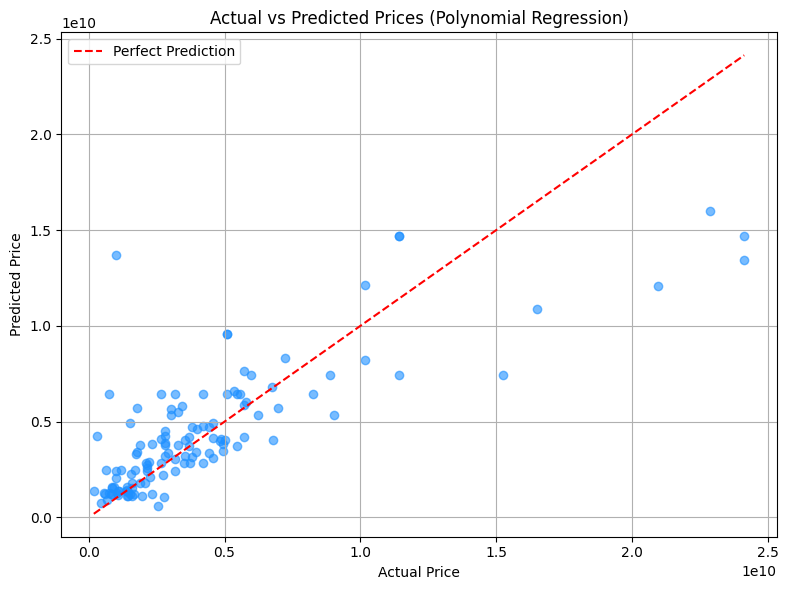

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.title('Actual vs Predicted Prices (Polynomial Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
